# MACHINE LEARNING ALGORITHMS FOR DEVELOPING A HAND GESTURE RECOGNITION WEARABLE TECHNOLOGY

The aim of this project is to develop a wearable device that accurately detects and classifies hand gestures using electromyography (EMG) data. Electromyography (EMG) data from the user's forearm will be collected by wearable technology sensors, which is then analyzed using machine learning algorithms and provide instantaneous detection and categorization of various hand gesture movements. The goal is to create a wearable technology proof of concept that demonstrates its viability and potential for use in a variety of fields, such as prosthetics, rehabilitation, human-machine interaction, gaming, and virtual reality.

## LOADING THE DATASET

In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


import warnings
warnings.simplefilter('ignore')

In [2]:
# Path to the main folder containing the gesture folders
data_folder = 'C:\\Users\\PC\\Downloads\\EMG_data_for_gestures-master'

# Create an empty dataframe to store the merged data
merged_data = pd.DataFrame()

# Iterate over the gesture folders
for folder_name in os.listdir(data_folder):
    folder_path = os.path.join(data_folder, folder_name)
    if os.path.isdir(folder_path):
        subject = int(folder_name)  # Since folder names are numbers
        for file_name in os.listdir(folder_path):
            if file_name.endswith('.txt'):
                file_path = os.path.join(folder_path, file_name)
                df = pd.read_csv(file_path, sep='\t')  # Since the data is tab-separated
                df['subject'] = subject
                merged_data = merged_data.append(df, ignore_index=True)

# Renaming the columns
expected_columns = ['Time'] + [f'Channel{i}' for i in range(1, 9)] + ['Class', 'Subject']
merged_data.columns = expected_columns

# Reset the index
merged_data.reset_index(drop=True, inplace=True)

# Display the merged dataset
pd.set_option('display.expand_frame_repr', False)
print(merged_data.head())

   Time  Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  Channel7  Channel8  Class  Subject
0     1   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  -0.00001    0.0        1
1     5   0.00001  -0.00002  -0.00001  -0.00003   0.00000  -0.00001   0.00000  -0.00001    0.0        1
2     6  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001    0.0        1
3     7  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001    0.0        1
4     8  -0.00001   0.00001   0.00002   0.00000   0.00001  -0.00002  -0.00001   0.00001    0.0        1


In [3]:
merged_data.tail()

,Time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Class,Subject
4237903,50962,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0.0,36
4237904,50963,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0.0,36
4237905,50964,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0.0,36
4237906,50965,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0.0,36
4237907,50966,0.00001,-0.00001,-0.00002,-0.00004,-0.00012,0.0,0.00002,0.00002,0.0,36


## DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS(EDA)

In [4]:
# Checking for the number of rows and columns in the dataset
merged_data.shape

(4237908, 11)

In [5]:
# Checking for null values
merged_data.isnull().any().sum()

1

In [6]:
# Checking for duplicated cells
merged_data.duplicated().sum()

0

In [7]:
# Checking for the column containing the null value
print(merged_data.columns[merged_data.isnull().any()])

Index(['Class'], dtype='object')


In [8]:
# Checking for the row containing the null value
print(merged_data[merged_data['Class'].isnull()])

          Time  Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  Channel7  Channel8  Class  Subject
3985214  97144  -0.00002  -0.00003  -0.00003  -0.00002  -0.00002       0.0       0.0  -0.00001    NaN       34


In [9]:
# dropping the null value
merged_data.dropna(subset=['Class'], inplace=True)

# Checking for the number of rows and columns after dropping the null value
merged_data.shape

(4237907, 11)

In [10]:
#Defining a function to plot a bar chart
def plot_barchart(x, y, title, xlable=None, ylable=None):
    plt.figure(figsize=(15, 5))
    sns.barplot(x, y)
    plt.title(title, fontsize=18)
    plt.xlabel(xlable, fontsize=14)
    plt.ylabel(ylable, fontsize=14)
    plt.xticks(rotation=65)
    plt.show()

In [11]:
# Defining a function to plot the Percentage on bar chart
def plot_percentage(feature, title="", limited=False, n=10):
    print("Total unique values are: ", len(feature.value_counts()), "\n\n")
    print("Category\tValue\n")
    if limited:
        data = feature.value_counts()[0:n]
    else:
        data = feature.value_counts()
    print(data)
    categories_num = len(data)
    #plotting bar-plot and pie chart
    sns.set_style('darkgrid')
    plt.figure(figsize=(16,5))
    plt.title(title, fontsize=18)
    plt.xticks(rotation=45)
    plot = sns.barplot(x=data.index, y=data.values, edgecolor="black", palette=sns.palettes.color_palette("icefire"))
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.08
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12)
    plt.show()

Total unique values are:  8 


Category	Value

0.0    2725157
6.0     253009
5.0     251733
4.0     251570
1.0     250055
3.0     249494
2.0     243193
7.0      13696
Name: Class, dtype: int64


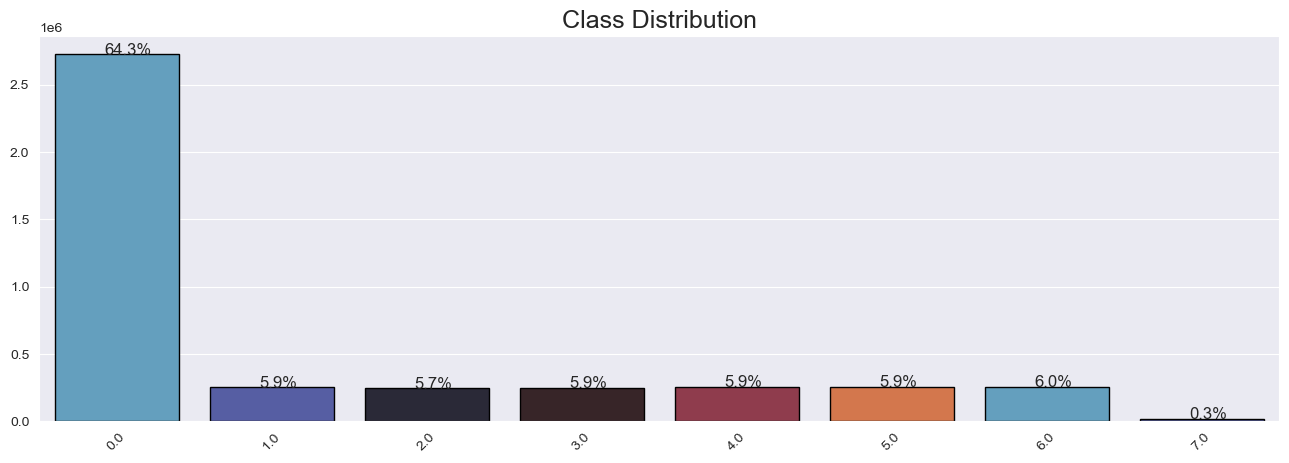

In [12]:
#To check for the distribution of the classes in the dataset
plot_percentage(merged_data.Class, "Class Distribution")

Total unique values are:  36 


Category	Value

13    153240
30    148561
11    147326
2     136426
7     132640
17    132085
34    131202
18    129312
12    128551
20    127853
9     127647
10    123089
32    122930
1     121170
22    119629
21    119247
8     117948
24    116940
25    116747
23    115619
4     114198
33    112105
19    109906
5     107248
27    106799
26    106154
29    105987
3     105785
16    105501
15    105396
36    101754
14    101003
6      99619
35     99501
28     97766
31     91023
Name: Subject, dtype: int64


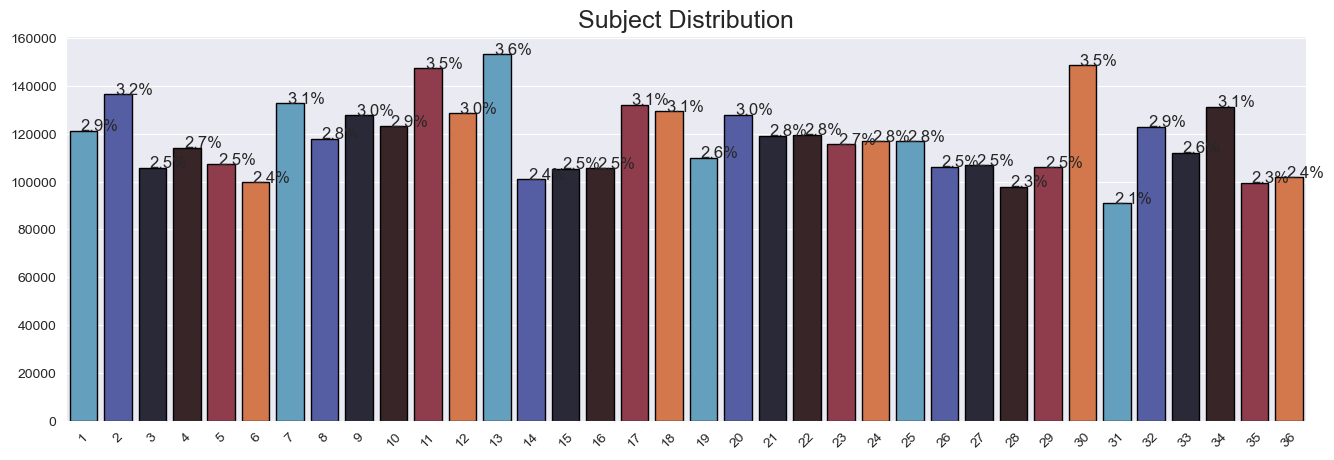

In [13]:
#To check for the distribution of the classes in the dataset
plot_percentage(merged_data.Subject, "Subject Distribution")

In [14]:
# Creating a copy of the dataset
dataset = merged_data.copy()

In [15]:
# Since the class 0 contains unmarked data/ gestures, I would be dropping it to allow us focus on other classes that are marked
merged_data = merged_data[merged_data['Class'] != 0]


In [16]:
# Since class 7 only contains 2 gestures, I would be dropping it
merged_data = merged_data[merged_data['Class'] != 7]

In [17]:
merged_data.head()

,Time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Class,Subject
2287,2400,-0.00001,0.00000,-0.00001,0.00000,0.00000,-0.00001,-0.00001,0.00001,1.0,1
2288,2401,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
2289,2402,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
2290,2403,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1
2291,2404,-0.00001,-0.00002,0.00000,-0.00001,-0.00001,-0.00001,-0.00003,-0.00002,1.0,1


Total unique values are:  6 


Category	Value

6.0    253009
5.0    251733
4.0    251570
1.0    250055
3.0    249494
2.0    243193
Name: Class, dtype: int64


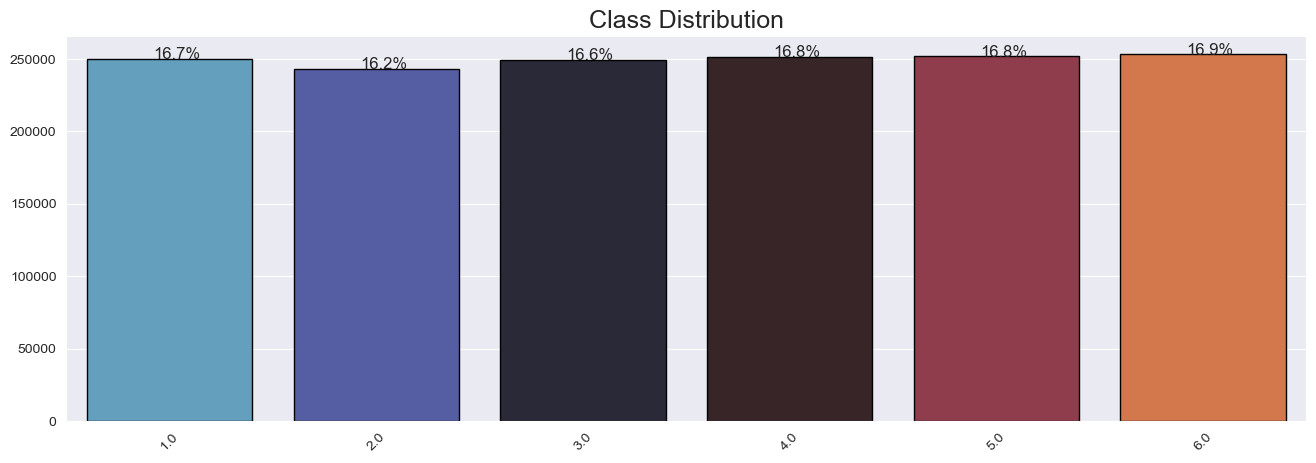

In [18]:
#To check for the distribution of the classes in the dataset
plot_percentage(merged_data.Class, "Class Distribution")

In [19]:
merged_data.shape

(1499054, 11)

## POSITIVE RECTIFICATION

Positive rectification is a preprocessing step in EMG signal analysis that helps to emphasize the magnitude of muscle activation, simplify signal analysis, and improve signal consistency, thereby aiding in the extraction of meaningful information from the EMG dataset.

In [20]:
# Apply positive rectification to channels "Channel1" to "Channel8"
channels = merged_data.columns[1:9]  # Select columns "Channel1" to "Channel8"
for channel in channels:
    merged_data[channel] = np.abs(merged_data[channel])

# Print the updated DataFrame
print(merged_data)

          Time  Channel1  Channel2  Channel3  Channel4  Channel5  Channel6  Channel7  Channel8  Class  Subject
2287      2400   0.00001   0.00000   0.00001   0.00000   0.00000   0.00001   0.00001   0.00001    1.0        1
2288      2401   0.00001   0.00002   0.00000   0.00001   0.00001   0.00001   0.00003   0.00002    1.0        1
2289      2402   0.00001   0.00002   0.00000   0.00001   0.00001   0.00001   0.00003   0.00002    1.0        1
2290      2403   0.00001   0.00002   0.00000   0.00001   0.00001   0.00001   0.00003   0.00002    1.0        1
2291      2404   0.00001   0.00002   0.00000   0.00001   0.00001   0.00001   0.00003   0.00002    1.0        1
...        ...       ...       ...       ...       ...       ...       ...       ...       ...    ...      ...
4237208  50226   0.00009   0.00001   0.00003   0.00001   0.00003   0.00008   0.00004   0.00000    6.0       36
4237209  50227   0.00009   0.00001   0.00003   0.00001   0.00003   0.00008   0.00004   0.00000    6.0       36
4

## SIGNAL FILTERING

Signal filtering is used to modify or remove specific frequency components from a signal. It plays a crucial role in preprocessing the EMG data. It enhances its quality, remove noise, extract relevant information, and facilitate further analysis and interpretation. It also helps to obtain reliable and meaningful insights from the EMG signals, leading to better understanding of gesture recognition, muscle activity and other related factors to be  considered in modeling the data.

In carrying this out,  a cut off frequency of 0.1 was used with an Order of 4. The filtering was applied on the 8 channels  from Channel 1 to 8 then  a Low-Pass Butterworth filter was applied.

In [21]:
import scipy.signal as signal

# Define the filter parameters
cutoff_freq = 5  # Cutoff frequency in Hz
order = 4  # Filter order

# Calculate the Nyquist frequency
nyquist_freq = 0.5 * 1000  # Sampling frequency is 1000 Hz, so Nyquist frequency is half of that

# Calculate the normalized cutoff frequency
normalized_cutoff = cutoff_freq / nyquist_freq

# Apply filtering to columns "Channel1" to "Channel8"
channels = merged_data.columns[1:9]  # Select columns "Channel1" to "Channel8"
for channel in channels:
    # Get the signal values from the column
    signal_values = merged_data[channel].values
    
    # Apply low-pass Butterworth filter
    b, a = signal.butter(order, normalized_cutoff, fs=1)
    filtered_signal = signal.lfilter(b, a, signal_values)
    
    # Update the column with the filtered signal
    merged_data[channel] = filtered_signal

# Print the updated DataFrame
print(merged_data)

          Time      Channel1      Channel2      Channel3      Channel4      Channel5      Channel6      Channel7      Channel8  Class  Subject
2287      2400  8.984861e-12  0.000000e+00  8.984861e-12  0.000000e+00  0.000000e+00  8.984861e-12  8.984861e-12  8.984861e-12    1.0        1
2288      2401  7.938867e-11  1.796972e-11  7.040381e-11  8.984861e-12  8.984861e-12  7.938867e-11  9.735839e-11  8.837353e-11    1.0        1
2289      2402  3.537508e-10  1.587773e-10  2.743621e-10  7.938867e-11  7.938867e-11  3.537508e-10  5.125281e-10  4.331394e-10    1.0        1
2290      2403  1.085157e-09  7.075015e-10  7.314062e-10  3.537508e-10  3.537508e-10  1.085157e-09  1.792659e-09  1.438908e-09    1.0        1
2291      2404  2.626135e-09  2.170314e-09  1.540978e-09  1.085157e-09  1.085157e-09  2.626135e-09  4.796449e-09  3.711292e-09    1.0        1
...        ...           ...           ...           ...           ...           ...           ...           ...           ...    ...      ...

In [22]:
merged_data.head()

,Time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Class,Subject
2287,2400,8.984861e-12,0.000000e+00,8.984861e-12,0.000000e+00,0.000000e+00,8.984861e-12,8.984861e-12,8.984861e-12,1.0,1
2288,2401,7.938867e-11,1.796972e-11,7.040381e-11,8.984861e-12,8.984861e-12,7.938867e-11,9.735839e-11,8.837353e-11,1.0,1
2289,2402,3.537508e-10,1.587773e-10,2.743621e-10,7.938867e-11,7.938867e-11,3.537508e-10,5.125281e-10,4.331394e-10,1.0,1
2290,2403,1.085157e-09,7.075015e-10,7.314062e-10,3.537508e-10,3.537508e-10,1.085157e-09,1.792659e-09,1.438908e-09,1.0,1
2291,2404,2.626135e-09,2.170314e-09,1.540978e-09,1.085157e-09,1.085157e-09,2.626135e-09,4.796449e-09,3.711292e-09,1.0,1


## WINDOWING

Windowing is a technique used in signal processing to divide a continuous signal into smaller segments called windows or frames. This technique allows for the analysis of the signal in shorter, localized segments rather than considering the entire signal at once.For this  project, I used the Sliding window technique. 
Sliding windowing, also known as window sliding or window shifting, is an extension of windowing where the windows are shifted along the signal with a certain stride or step size. This means that each window overlaps with the preceding and succeeding windows, creating a continuous stream of overlapping segments.

Sliding Windowing is important for the dataset as it allows us to capture temporal dynamics, extract relevant features, and perform accurate classification or pattern recognition tasks. It enables the analysis of localized segments of the signal, providing insights into muscle activity and facilitating further analysis and interpretation of the EMG dataset.

In [23]:
window_size = 100  # Size of the sliding window
slide_length = 50  # Length of the slide

num_samples = len(merged_data)  # Total number of samples in the dataset
num_windows = (num_samples - window_size) // slide_length + 1  # Number of windows

windowed_data = []  # List to store the windowed segments

for i in range(num_windows):
    start = i * slide_length  # Starting index of the window
    end = start + window_size  # Ending index of the window
    
    # Extract the windowed segment
    window = merged_data.iloc[start:end]
    
    # Append the windowed segment to the list
    windowed_data.append(window)

# Convert the list of windowed segments into a DataFrame
windowed_data = pd.concat(windowed_data, ignore_index=True)

# Print the windowed data
windowed_data.head()

,Time,Channel1,Channel2,Channel3,Channel4,Channel5,Channel6,Channel7,Channel8,Class,Subject
0,2400,8.984861e-12,0.000000e+00,8.984861e-12,0.000000e+00,0.000000e+00,8.984861e-12,8.984861e-12,8.984861e-12,1.0,1
1,2401,7.938867e-11,1.796972e-11,7.040381e-11,8.984861e-12,8.984861e-12,7.938867e-11,9.735839e-11,8.837353e-11,1.0,1
2,2402,3.537508e-10,1.587773e-10,2.743621e-10,7.938867e-11,7.938867e-11,3.537508e-10,5.125281e-10,4.331394e-10,1.0,1
3,2403,1.085157e-09,7.075015e-10,7.314062e-10,3.537508e-10,3.537508e-10,1.085157e-09,1.792659e-09,1.438908e-09,1.0,1
4,2404,2.626135e-09,2.170314e-09,1.540978e-09,1.085157e-09,1.085157e-09,2.626135e-09,4.796449e-09,3.711292e-09,1.0,1


## FEATURE EXTRACTION

Feature extraction is the process of transforming raw data into a reduced and meaningful set of features that capture the essential characteristics of the data. For the EMG dataset, feature extraction involves extracting relevant information from the raw EMG signals to represent muscle activity and gestures in a more concise and informative manner. It allows for more efficient analysis, improved classification or recognition performance, noise robustness, and provides interpretable and meaningful representations of muscle activity and gestures. It aids in extracting the most relevant information from the EMG signals and provides valuable insights to make informed decisions based on the extracted features.

In carrying this out, the windowed dataset was grouped into Subject and Class. A class was created to extract 3 major features which are the Root Mean Square, Simple Square Integral and the Absolute Differential Signal. Also, the dataset was aggregated with the features extracted including the Min and Max values.

In [24]:
# Grouping the windowed dataset into Subject and Classes
windowed_data=windowed_data.groupby(['Subject','Class'])

In [25]:
class FeatureExtractor:
    @staticmethod # Root Mean Square
    def RMS(data):
        return np.sqrt(np.mean(data**2, axis=0))

    @staticmethod # Simple Square Integral
    def SSI(data):
        return np.sum(data**2, axis=0)

    @staticmethod # Absolute Differential Signal
    def ADS(data):
        return np.sum(np.abs(np.diff(data, axis=0)), axis=0)


def print_estimator_name(estimator):
    return estimator.__class__.__name__

In [26]:
feature_extractor = FeatureExtractor()

# Perform feature extraction on the merged_data dataset
df = windowed_data.agg(['min', 'max', feature_extractor.RMS, feature_extractor.SSI,
                           feature_extractor.ADS, np.ptp])

# Reset the index of the dataset
df = df.reset_index()

# Display the first few rows of the dataset
print(df.head())

  Subject Class   Time                                                          Channel1            ...  Channel7                                Channel8                                                  
                   min    max           RMS             SSI     ADS    ptp           min       max  ...       RMS       SSI       ADS       ptp       min       max       RMS       SSI       ADS       ptp
0       1   1.0    880  36741  22983.698802   7697664983536  117357  35861 -2.787990e-06  0.000116  ...  0.000015  0.000003  0.003918  0.000122 -0.000001  0.000139  0.000017  0.000004  0.003971  0.000140
1       1   2.0   4695  40244  27198.742335  10069770809858  115155  35549  4.357732e-06  0.000522  ...  0.000189  0.000486  0.044995  0.000616  0.000008  0.000339  0.000128  0.000223  0.028432  0.000331
2       1   3.0  10254  46284  32125.782009  15128021517510  116921  36030 -8.769845e-06  0.000647  ...  0.000070  0.000071  0.018784  0.000220 -0.000002  0.000446  0.000138  0.000279 

In [27]:
df.shape

(216, 56)

# MACHINE LEARNING MODELLING

In this section, i would be training different machine learning models to see their performance and compare their accuracy to  find the one that would best predict the hand gestures. 

## 1. RANDOM FOREST CLASSIFIER (RFC) 

In carrying out the model, the code builds a random forest classifier, trains it on the training data, evaluates its performance on the test data, and provides evaluation metrics and a visualization of the confusion matrix.

In [28]:
# Prepare the features and labels
features = df.drop(columns=["Subject", "Class"])
labels = df["Class"]

In [29]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=42)


### NORMALIZATION (SCALING)

Normalization was used to carry out scaling on the dataset. The data was normalized using the Mean and Standard Deviation. By normalizing the data, it ensured that all features have zero mean and unit variance, making them comparable and suitable for various machine learning algorithms. This helps in improving the stability, performance, and interpretability of the models trained on the data.

In [30]:
# Normalize the data using mean and standard deviation
mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std


In [31]:
# Optimizing the parameters using hyperparameter tuning
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, plot_confusion_matrix

# Define the RandomForestClassifier with specific parameters
rfc = RandomForestClassifier(
    criterion='entropy', max_depth=50, max_features=5, max_leaf_nodes=50,
    min_samples_split=2, n_estimators=2000, oob_score=True
)


F1 Macro Score: 0.9020946486463727
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 2  0  9  0  0  0]
 [ 0  0  0 12  2  0]
 [ 0  0  0  3  8  0]
 [ 0  0  0  0  0  5]]
Accuracy Score: 0.8923076923076924
OOB Validation Score: 0.9337748344370861


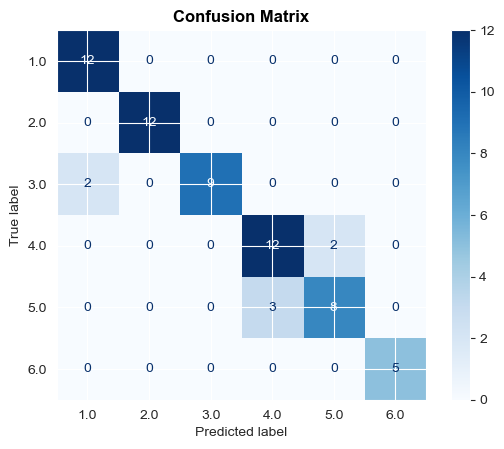

In [32]:
# Train the RandomForestClassifier
rfc.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = rfc.predict(X_test)

# Calculate evaluation metrics
f1_macro = f1_score(y_test, y_test_pred, average='macro')
confusion_mtx = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

# Print the evaluation metrics
print("F1 Macro Score:", f1_macro)
print("Confusion Matrix:")
print(confusion_mtx)
print("Accuracy Score:", accuracy)
print("OOB Validation Score:", rfc.oob_score_)

# Plot the confusion matrix with customized color
disp = plot_confusion_matrix(rfc, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix", color="black", weight="bold")
plt.show()

## 2. SUPPORT VECTOR MACHINES

In [33]:
from sklearn.svm import SVC

# Define the SVC classifier with specific parameters
svc = SVC(C=100, kernel='poly', gamma=0.01, decision_function_shape='ovo')


In [34]:
# Train the SVC classifier
svc.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = svc.predict(X_test)

# Calculate evaluation metrics
f1_macro = f1_score(y_test, y_test_pred, average='macro')
confusion_mtx = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)


F1 Macro Score: 0.8579067990832696
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 12  0  0  0  0]
 [ 0  4  6  0  0  1]
 [ 0  0  0 12  2  0]
 [ 0  0  0  2  9  0]
 [ 0  0  0  0  0  5]]
Accuracy Score: 0.8615384615384616


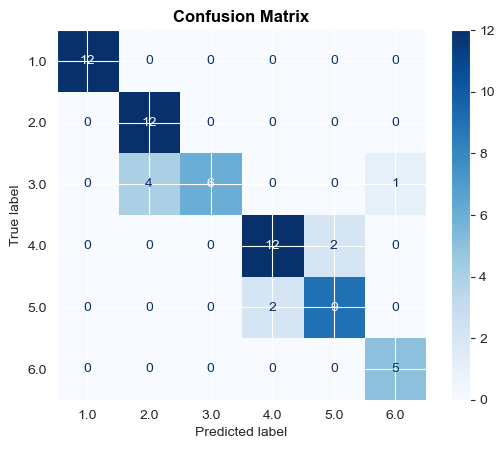

In [35]:
# Print the evaluation metrics
print("F1 Macro Score:", f1_macro)
print("Confusion Matrix:")
print(confusion_mtx)
print("Accuracy Score:", accuracy)

# Plot the confusion matrix with customized color
disp = plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix", color="black", weight="bold")
plt.show()


## K-NEAREST NEIGHBORS CLASSIFIERS

In [36]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN classifier with specific parameters
knn = KNeighborsClassifier(metric='minkowski', algorithm='auto', n_neighbors=10, p=2, weights='distance', leaf_size=5)

In [37]:
# Train the KNN classifier
knn.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = knn.predict(X_test)

# Calculate evaluation metrics
f1_macro = f1_score(y_test, y_test_pred, average='macro')
confusion_mtx = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

F1 Macro Score: 0.9164426877470356
Confusion Matrix:
[[12  0  0  0  0  0]
 [ 0 10  2  0  0  0]
 [ 1  0 10  0  0  0]
 [ 0  0  0 11  3  0]
 [ 0  0  0  0 11  0]
 [ 0  0  0  0  0  5]]
Accuracy Score: 0.9076923076923077


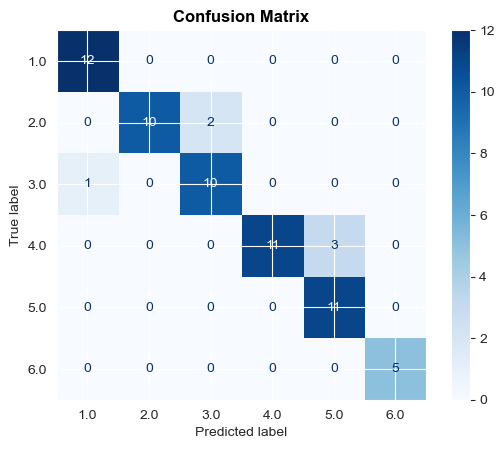

In [38]:
# Print the evaluation metrics
print("F1 Macro Score:", f1_macro)
print("Confusion Matrix:")
print(confusion_mtx)
print("Accuracy Score:", accuracy)

# Plot the confusion matrix with customized color
disp = plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix", color="black", weight="bold")
plt.show()

## DECISION TREE CLASSIFIERS

In [39]:
from sklearn.tree import DecisionTreeClassifier

# Define the Decision Tree classifier with specific parameters
dt = DecisionTreeClassifier(
    criterion='entropy', max_depth=50, max_features=5, max_leaf_nodes=50, min_samples_split=2
)

In [40]:
# Train the Decision Tree classifier
dt.fit(X_train, y_train)

# Make predictions on the test set
y_test_pred = dt.predict(X_test)

# Calculate evaluation metrics
f1_macro = f1_score(y_test, y_test_pred, average='macro')
confusion_mtx = confusion_matrix(y_test, y_test_pred)
accuracy = accuracy_score(y_test, y_test_pred)

F1 Macro Score: 0.6588924360663491
Confusion Matrix:
[[ 9  0  0  0  0  3]
 [ 0  5  7  0  0  0]
 [ 2  3  5  0  0  1]
 [ 0  0  1 10  2  1]
 [ 0  0  0  2  9  0]
 [ 0  0  0  0  0  5]]
Accuracy Score: 0.6615384615384615


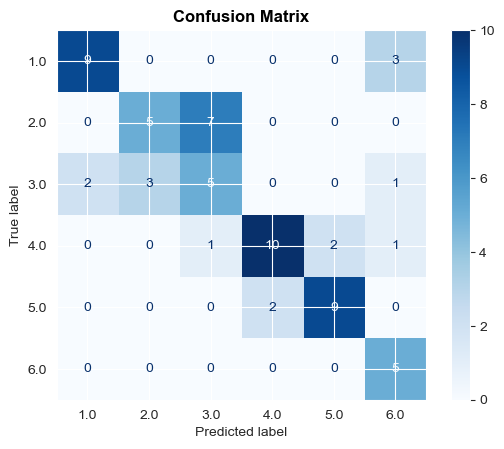

In [41]:
# Print the evaluation metrics
print("F1 Macro Score:", f1_macro)
print("Confusion Matrix:")
print(confusion_mtx)
print("Accuracy Score:", accuracy)

# Plot the confusion matrix with customized color
disp = plot_confusion_matrix(dt, X_test, y_test, cmap=plt.cm.Blues)
disp.ax_.set_title("Confusion Matrix", color="black", weight="bold")
plt.show()

## RESULTS AND CONCLUSION

Comparing the results shown above, it indicates that the K-Nearest Neighbor Classifier (KNN) had the best performance with an accuracy of 91% and F1-Score of 92%. This was followed closely by the Random Forest Classifier (RFC) with an accuracy of 89% and F1- Score of 90%.  The Support Vector Machine (SVM) model gives an accuracy of 86% with an F1- Score of 86% while the model with the least performance was the Decision Tree with an accuracy of 66% and F1- Score of 66% respectively. 

The results obtained from the models show that Machine Learning has significant potential to be used in accurately and precisely categorizing hand gestures through the EMG signals. The K-Nearest Neighbor had the highest performance followed by the Random Forest Classifier (RFC) then Support Vector Machine (SVM) and the Decision Tree having the least performance.

In conclusion, the use of wearable technology devices to recognize hand gestures using the EMG signals shows significant potential for various applications such as Virtual Reality, Human- Computer Interaction, Rehabilitation etc. The use of machine learning algorithms for creating precise and accurate hand gestures recognition systems can lead to the development of other future applications that would be useful to humans. 
